<a href="https://colab.research.google.com/github/onesvadba/MPA-MLF/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MiniProject - march 2024
Ondřej Nesvadba & David Pěčonka

## 1) Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 3) Load dataset from google drive

In [ ]:
path_to_dataset = 'drive/MyDrive/Colab Notebooks/MPA-MLF/Data_prepared_final.csv'
pd_dataset = pd.read_csv(path_to_dataset)

In [ ]:
pd_dataset

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


## 4) Applying Elbow method using K-Means to find optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

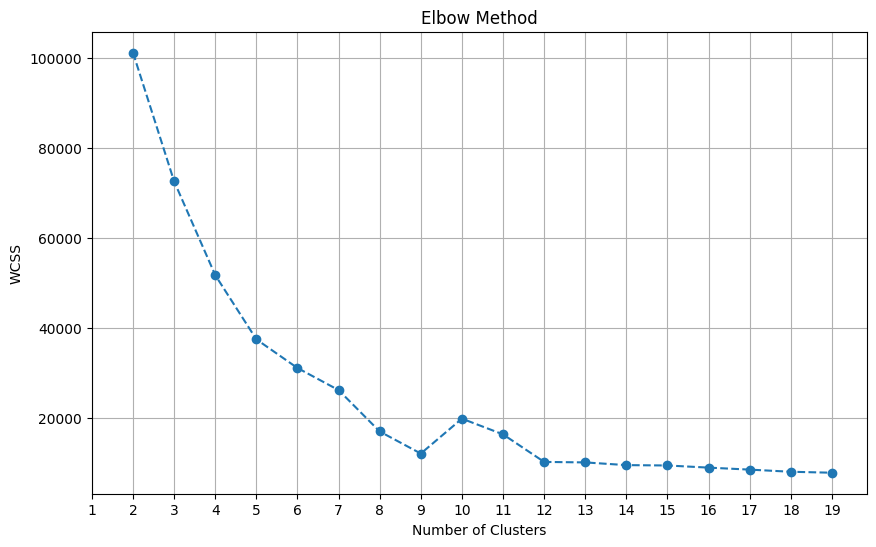

In [ ]:
df = pd_dataset

# Perform data preprocessing
# features are in columns
X = df[['time [s]', 'cfo_meas', 'cfo_demod', 'gain_imb', 'iq_imb',
        'or_off', 'quadr_err', 'ph_err', 'mag_err', 'evm']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature reduction
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Apply the elbow method to find the optimal k (number of clusters)
wcss = []

# Repeat K-means for different values of k (number of clusters)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


# Project description
For sorting given dataset of 9 features, we decided to use K-Means with Elbow method to determine optimal number of clusters to sort the data. K-Means was choosen, because we need some method of unsupervised ML as our dataset is not labeled. To find optimal number of clusters, Elbow method is often used.

For data preprocessing, we used python library StandardScaler from sklearn. As our dataset has a lot of features - 9, we opted to lower the number of features using PCA.

We did not write the script from scratch. We helped ourselves with internet examples and chatGPT. We also used various python libraries. After we had first model, next step in our project was to try tuning the hyperparameters for potential better results. We tried to change:
*   method of initialization initial centroids
*   number of initialization
*   maximum iteration

As we can see from the final graph, the elbow point is at number of clusters equal to nine. Therefore we estimate that there are nine different wireless transmitters.



